Nama:  Muhammad;
Email: mhmdmuhammad@gmail.com;
Alamat: Kota Surakarta, Jawa Tengah;
Bergabung sejak 23 Jul 2020;


---



In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-06-27 09:12:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.13MB/s    in 63s     

2021-06-27 09:13:38 (4.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile,os
path_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(path_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [32]:
delpath = ('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')
os.remove(delpath)

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_data = '/tmp/rockpaperscissors/rps-cv-images'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    base_data,
    shuffle=True,
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_data, 
    shuffle=True,
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse',
    subset='validation') 

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [133]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [134]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(),
              metrics=['accuracy'])

In [135]:
model.fit(
      train_generator,
      steps_per_epoch=55,  
      epochs=50, 
      validation_data=validation_generator, 
      validation_steps=20,  
      verbose=2)

Epoch 1/50
55/55 - 22s - loss: 1.0943 - accuracy: 0.3474 - val_loss: 1.0988 - val_accuracy: 0.3350
Epoch 2/50
55/55 - 22s - loss: 1.0883 - accuracy: 0.4099 - val_loss: 1.0873 - val_accuracy: 0.3500
Epoch 3/50
55/55 - 22s - loss: 1.0866 - accuracy: 0.4036 - val_loss: 1.0802 - val_accuracy: 0.5550
Epoch 4/50
55/55 - 22s - loss: 1.0803 - accuracy: 0.4582 - val_loss: 1.0771 - val_accuracy: 0.6800
Epoch 5/50
55/55 - 22s - loss: 1.0704 - accuracy: 0.5764 - val_loss: 1.0722 - val_accuracy: 0.3200
Epoch 6/50
55/55 - 22s - loss: 1.0596 - accuracy: 0.4509 - val_loss: 1.0580 - val_accuracy: 0.3600
Epoch 7/50
55/55 - 22s - loss: 1.0469 - accuracy: 0.5182 - val_loss: 1.0561 - val_accuracy: 0.5050
Epoch 8/50
55/55 - 22s - loss: 1.0278 - accuracy: 0.6158 - val_loss: 1.0197 - val_accuracy: 0.6400
Epoch 9/50
55/55 - 22s - loss: 1.0002 - accuracy: 0.6218 - val_loss: 1.0059 - val_accuracy: 0.5850
Epoch 10/50
55/55 - 22s - loss: 0.9439 - accuracy: 0.6782 - val_loss: 0.9177 - val_accuracy: 0.7200
Epoch 11/

Saving WhatsApp Image 2021-06-27 at 22.17.02.jpeg to WhatsApp Image 2021-06-27 at 22.17.02 (12).jpeg


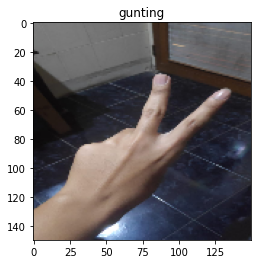

In [144]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
i = 1
fig = plt.figure(figsize=(15,4))

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  plt.subplot(1,3,i)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] != 1 and classes[0][1] != 1:
    judul = 'gunting'
  elif classes[0][1] == 1:
    judul = 'batu'
  else:
    judul = 'kertas'

  plt.title(judul)
  i += 1
